In [1]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM,Input
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.models import load_model
import random
from sklearn import decomposition
from sklearn.metrics import r2_score
random.seed(42)
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
!git clone https://github.com/ShihaoCui/Mydata_1.git

Cloning into 'Mydata_1'...
remote: Enumerating objects: 613, done.
remote: Counting objects: 100% (287/287), done.
remote: Compressing objects: 100% (219/219), done.
remote: Total 613 (delta 135), reused 213 (delta 62), pack-reused 326
Receiving objects: 100% (613/613), 356.98 MiB | 20.76 MiB/s, done.
Resolving deltas: 100% (214/214), done.
Updating files: 100% (284/284), done.


# Data processing

In [5]:
## Data Load
filenames = './Mydata_1/XinxunLau3DPrintability/Data of result sharing/Model 3_PhysicsPropertyPrediction/Case 1/x_train.mat'
dataFile = filenames
data = scio.loadmat(dataFile)
x_train = data['x_train']

filenames = './Mydata_1/XinxunLau3DPrintability/Data of result sharing/Model 3_PhysicsPropertyPrediction/Case 1/y_train.mat'
dataFile = filenames
data = scio.loadmat(dataFile)
y_train = data['y_train']

filenames = './Mydata_1/XinxunLau3DPrintability/Data of result sharing/Model 3_PhysicsPropertyPrediction/Case 1/x_test.mat'
dataFile = filenames
data = scio.loadmat(dataFile)
x_test = data['x_test']

filenames = './Mydata_1/XinxunLau3DPrintability/Data of result sharing/Model 3_PhysicsPropertyPrediction/Case 1/y_test.mat'
dataFile = filenames
data = scio.loadmat(dataFile)
y_test = data['y_test']

# 1. Height:  Data for model traning and testing

In [6]:
x_train.shape

(54, 12)

In [7]:
y_train.shape

(54, 4)

In [8]:
x_test.shape

(14, 12)

In [9]:
y_test.shape

(14, 4)

In [10]:
# plt.plot(y_train)

### DNNs

In [11]:
from keras.layers import Activation, Dense,BatchNormalization
model= Sequential()
model.add(Dense((128),batch_input_shape=(None,x_train.shape[1])))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense((128)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense((32)))
model.add(Activation('relu'))
model.add(Dense((16)))
model.add(Activation('relu'))
model.add(Dense((16)))
model.add(Activation('relu'))
model.add(Dense((4)))
model.compile(loss = 'mean_absolute_percentage_error',optimizer = 'Adam',metrics=['accuracy']) #categorical_crossentropy
model.summary()# RMSprop mean_absolute_percentage_error

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4

In [12]:
history2 = model.fit(x_train,y_train,epochs=1000,batch_size=2,validation_data=(x_test,y_test))

Epoch 1/1000
27/27 [==============================] - 5s 12ms/step - loss: 84.9003 - accuracy: 0.5185 - val_loss: 67.7079 - val_accuracy: 0.5714
Epoch 2/1000
27/27 [==============================] - 0s 6ms/step - loss: 51.4167 - accuracy: 0.6111 - val_loss: 27.4506 - val_accuracy: 0.5714
Epoch 3/1000
27/27 [==============================] - 0s 5ms/step - loss: 41.1666 - accuracy: 0.5926 - val_loss: 25.8304 - val_accuracy: 0.7143
Epoch 4/1000
27/27 [==============================] - 0s 5ms/step - loss: 36.8989 - accuracy: 0.5185 - val_loss: 21.2994 - val_accuracy: 0.7143
Epoch 5/1000
27/27 [==============================] - 0s 5ms/step - loss: 31.6527 - accuracy: 0.5370 - val_loss: 26.2002 - val_accuracy: 0.7143
Epoch 6/1000
27/27 [==============================] - 0s 5ms/step - loss: 35.6418 - accuracy: 0.5926 - val_loss: 19.0103 - val_accuracy: 0.7143
Epoch 7/1000
27/27 [==============================] - 0s 5ms/step - loss: 31.4431 - accuracy: 0.6296 - val_loss: 21.3210 - val_accuracy

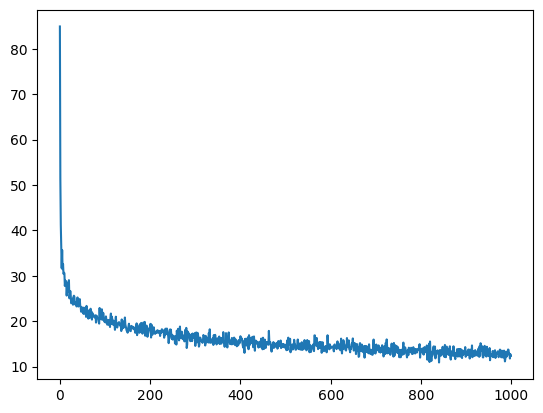

In [13]:
# Loss: convergence or not
plt.plot(history2.history['loss'])
plt.show()

In [14]:
# Save as MATLAB mat file
matfile_content = {'loss': history2.history['loss']}
savemat('loss.mat', matfile_content)


In [15]:
y_prediction1 = model.predict(x_train)
train_err = np.mean(np.abs(y_prediction1-y_train)/y_train,0)
1-train_err

2/2 [==============================] - 0s 3ms/step


array([0.9053671 , 0.92928774, 0.93490971, 0.87472865])

In [16]:
y_prediction2 = model.predict(x_test)
test_err = np.mean(np.abs(y_prediction2-y_test)/y_test,0)
1-test_err

1/1 [==============================] - 0s 18ms/step


array([0.91279823, 0.93598022, 0.89111799, 0.88253039])

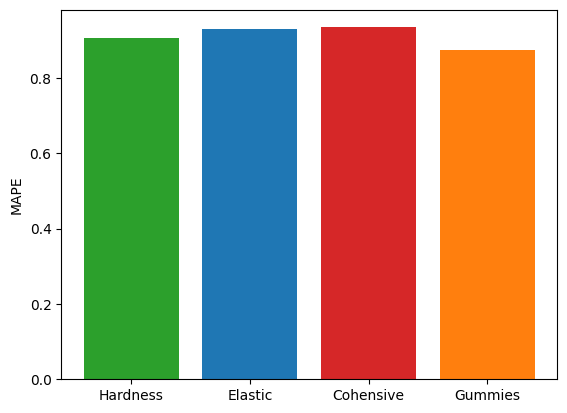

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['Hardness', 'Elastic', 'Cohensive', 'Gummies']
counts = 1-train_err
bar_labels = ['green', 'blue', '_red', 'orange']
bar_colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('MAPE')
plt.show()

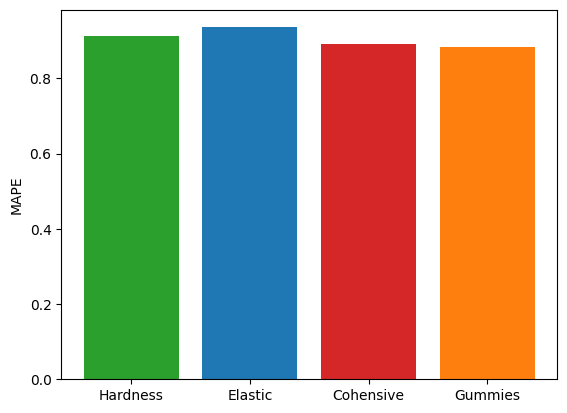

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['Hardness', 'Elastic', 'Cohensive', 'Gummies']
counts = 1-test_err
bar_labels = ['green', 'blue', '_red', 'orange']
bar_colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('MAPE')
plt.show()